In [1]:
folder = "side-50_dens-0.7_pop-0.3_hom-0.3_town-True_RANDOM"


FSI = False


import altair as alt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


folder_distance = "../results_data/results_data_supplementary/"+folder+"/distance_"+folder
folder_gravity = "../results_data/results_data_supplementary/"+folder+"/gravity_"+folder
folder_relevance = "../results_data/results_data_supplementary/"+folder+"/relevance_"+folder


##############################################################################




folder = folder_relevance

csv_list = os.listdir(folder)
results = pd.read_csv(folder+"/"+csv_list[0])

for csv in csv_list[1:]:
    temp = pd.read_csv(folder+"/"+csv)
    results = pd.concat([results,temp])


results["model"] = results["mobility"].apply(lambda m: eval(m)["model"])
results["metric"] = results["mobility"].apply(lambda m: eval(m)["metric"] if "metric" in m else 0)
results["alpha"] = results["mobility"].apply(lambda m: eval(m)["alpha"] if "alpha" in m else 0)

    
if FSI:
    results["total_segregation"] = results["fsi"] 

group_gravityalfa = results.groupby(["alpha"]).agg(mean_step=('Step', np.mean), 
                                                               mean_seg=('total_segregation', np.mean),
                                                               mean_cen_seg=('center_segregation', np.mean),
                                                                mean_per_seg=('periphery_segregation', np.mean),
                                                              ).reset_index()

#######################################


step_min = min(group_gravityalfa["mean_step"].min(), group_gravityalfa["mean_step"].min()) 
step_max = max(group_gravityalfa["mean_step"].max(), group_gravityalfa["mean_step"].max()) 



seg_min = min(group_gravityalfa["mean_seg"].min(), group_gravityalfa["mean_seg"].min()) 
seg_max = max(group_gravityalfa["mean_seg"].max(), group_gravityalfa["mean_seg"].max()) 


a1 = alt.Chart(group_gravityalfa).mark_circle(size=75).encode(
      x = alt.X('mean_step', scale=alt.Scale(domain=[step_min, step_max]),axis=alt.Axis(title='n')),
    y = alt.Y('mean_seg', scale=alt.Scale(domain=[seg_min, seg_max]), axis=alt.Axis(title='S')),
    color=alt.Color('alpha', scale=alt.Scale(scheme='oranges'), legend=alt.Legend(title="α", titleFontWeight="normal", labelFontSize=16,titleFontSize=20))
).properties(
    width=300,
    height=300)


def func(x, a, b, c):
    return a/(x**b)+c


xdata = group_gravityalfa["mean_step"]
ydata =  group_gravityalfa["mean_seg"]

try:
    popt, pcov = curve_fit(func, xdata, ydata)
    pred = pd.DataFrame()
    pred["xv"] = xdata
    pred["yv"] = func(xdata, *popt)
    
    print("a1")
    print("a/(x**b) +c")
    print(popt)

    rega1 = alt.Chart(pred).mark_line(color="grey", opacity=1, width=2, strokeDash=[10,5]).encode(x="xv", y="yv").properties(
        width=300,
        height=300
    )
except:
    print("no fit")


###########################################


a2 = alt.Chart(group_gravityalfa).mark_circle(size=75, color="black").encode(
      x = alt.X('alpha', scale=alt.Scale(domain=[0, 3]),axis=alt.Axis(title='α')),
    y = alt.Y('mean_step', scale=alt.Scale(domain=[step_min, step_max]), axis=alt.Axis(title='n'))
).properties(
    width=300,
    height=300)



def func(x,a, b,c):
    return (a**(b*x))+c


xdata = group_gravityalfa["alpha"]
ydata =  group_gravityalfa["mean_step"]


try:
    popt, pcov = curve_fit(func, xdata, ydata)
    pred = pd.DataFrame()
    pred["xv"] = xdata
    pred["yv"] = func(xdata, *popt)
    
    print("a2")
    print("(a**(b*x))+c")
    print(popt)

    rega2 = alt.Chart(pred).mark_line(color="grey", opacity=1, width=2, strokeDash=[10,5]).encode(x="xv", y="yv").properties(
        width=300,
        height=300
    )
except:
    print("no fit")



###########################################


a3 = alt.Chart(group_gravityalfa).mark_circle(size=75, color="black").encode(
      x = alt.X('alpha', scale=alt.Scale(domain=[0, 3]),axis=alt.Axis(title='α')),
    y = alt.Y('mean_seg', scale=alt.Scale(domain=[seg_min, seg_max]), axis=alt.Axis(title='S'))
).properties(
    width=300,
    height=300)


def func(x, a, b,c):
    return a*x**2+b*x+c


try:
    xdata = group_gravityalfa["alpha"]
    ydata =  group_gravityalfa["mean_seg"]

    popt, pcov = curve_fit(func, xdata, ydata)
    pred = pd.DataFrame()
    pred["xv"] = xdata
    pred["yv"] = func(xdata, *popt)

    print("a*x**2+b*x+c")
    print(popt)

    rega3 = alt.Chart(pred).mark_line(color="grey", opacity=1, width=2, strokeDash=[10,5]).encode(x="xv", y="yv").properties(
        width=300,
        height=300
    )
except:
    print("no fit")

    

alt.hconcat( a1,a2,a3  ).resolve_scale(
    color='independent').configure_axis(
    gridOpacity=0.5,titleFontWeight="normal", labelFontSize =16, titleFontSize=19, labelAngle=0
    
    )

no fit
no fit
no fit


alt.HConcatChart(...)

In [3]:
import altair as alt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder = "../results_data/results_data_main/gravity_side-50_dens-0.7_pop-0.3_hom-0.3_town-True/"



csv_list = os.listdir(folder)
results = pd.read_csv(folder+"/"+csv_list[0])

for csv in csv_list[1:]:
    temp = pd.read_csv(folder+"/"+csv)
    results = pd.concat([results,temp])


results["model"] = results["mobility"].apply(lambda m: eval(m)["model"])
results["metric"] = results["mobility"].apply(lambda m: eval(m)["metric"] if "metric" in m else 0)
results["beta"] = results["mobility"].apply(lambda m: eval(m)["beta"] if "beta" in m else 0)
results["alpha"] = results["mobility"].apply(lambda m: eval(m)["alpha"] if "alpha" in m else 0)

    
    
group_gravityalfabeta = results.groupby(["alpha","beta"]).agg(mean_step=('Step', np.mean), 
                                                               mean_seg=('total_segregation', np.mean),
                                                               mean_cen_seg=('center_segregation', np.mean),
                                                                mean_per_seg=('periphery_segregation', np.mean),
                                                              ).reset_index()


#group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2#2group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2#]
group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"] == group_gravityalfabeta["alpha"].apply(lambda x: int(x))]

group_gravityalfabeta.rename(columns={"mean_cen_seg": "center",
                                     "mean_per_seg": "periphery"}, inplace=True)


group_gravityalfabeta["seg_diff"] = group_gravityalfabeta["periphery"] - group_gravityalfabeta["center"]

df0 = group_gravityalfabeta[group_gravityalfabeta["alpha"]==0][["beta","center","seg_diff"]]


ch0 = alt.Chart(df0).mark_bar().encode(
    alt.X('beta:N', axis=alt.Axis(title="β")),
    alt.Y('seg_diff:Q', axis=alt.Axis(title='ΔS'), scale=alt.Scale(domain=[0,.1])),
   ).properties(title="α=0")

df1 = group_gravityalfabeta[group_gravityalfabeta["alpha"]==1][["beta","center","seg_diff"]]

ch1 =  alt.Chart(df1).mark_bar().encode(
    alt.X('beta:N', axis=alt.Axis(title="β")),
    alt.Y('seg_diff:Q', axis=alt.Axis(title=''), scale=alt.Scale(domain=[0,.1])),
  ).properties(title="α=1")

df2 = group_gravityalfabeta[group_gravityalfabeta["alpha"]==2][["beta","center","seg_diff"]]


ch2 = alt.Chart(df2).mark_bar().encode(
    alt.X('beta:N', axis=alt.Axis(title="β")),
    alt.Y('seg_diff:Q', axis=alt.Axis(title=''), scale=alt.Scale(domain=[0,.1])),
    ).properties(title="α=2")

df3 = group_gravityalfabeta[group_gravityalfabeta["alpha"]==3][["beta","center","seg_diff"]]


ch3 =  alt.Chart(df3).mark_bar().encode(
    alt.X('beta:N', axis=alt.Axis(title="β")),
    alt.Y('seg_diff:Q', axis=alt.Axis(title=''), scale=alt.Scale(domain=[0,.1])),
    ).properties(title="α=3")



alt.hconcat( ch0,ch1,ch2,ch3  ).configure_axis(
    gridOpacity=0.5,titleFontWeight="normal",  labelFontSize =16, titleFontSize=19, labelAngle=0
    
    ).configure_mark(
    color='#fcc40f'
).configure_title(fontSize=20, fontWeight="normal")


alt.HConcatChart(...)

In [4]:
import altair as alt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder = "../results_data/results_data_supplementary/gravity_extended_side-50_dens-0.7_pop-0.3_hom-0.3_town-True/"


csv_list = os.listdir(folder)
results = pd.read_csv(folder+"/"+csv_list[0])

for csv in csv_list[1:]:
    temp = pd.read_csv(folder+"/"+csv)
    results = pd.concat([results,temp])


results["model"] = results["mobility"].apply(lambda m: eval(m)["model"])
results["metric"] = results["mobility"].apply(lambda m: eval(m)["metric"] if "metric" in m else 0)
results["beta"] = results["mobility"].apply(lambda m: eval(m)["beta"] if "beta" in m else 0)
results["alpha"] = results["mobility"].apply(lambda m: eval(m)["alpha"] if "alpha" in m else 0)

    
    
group_gravityalfabeta = results.groupby(["alpha","beta"]).agg(mean_step=('Step', np.mean), 
                                                               mean_seg=('total_segregation', np.mean),
                                                               mean_cen_seg=('center_segregation', np.mean),
                                                                mean_per_seg=('periphery_segregation', np.mean),
                                                              ).reset_index()


#group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2#2group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2#]
group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"] == group_gravityalfabeta["alpha"].apply(lambda x: int(x))]



#group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2#2group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]<=2#]
group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"] == group_gravityalfabeta["alpha"].apply(lambda x: int(x))]


group_gravityalfabeta = group_gravityalfabeta[group_gravityalfabeta["alpha"]>=0]

heatmap1 = alt.Chart(group_gravityalfabeta).mark_rect().encode(
    alt.X('beta:O', title="β"),
    alt.Y('alpha:O', title="α", scale=alt.Scale(reverse=True)),
    
    color=alt.Color('mean_seg:Q',
        scale=alt.Scale(scheme='greens'),
        legend=alt.Legend(title="S", titleFontWeight="normal",  labelFontSize=16,titleFontSize=20),
    )).properties(
    width=450,
    height=300)


heatmap2 = alt.Chart(group_gravityalfabeta).mark_rect().encode(
    alt.X('beta:O', title="β"),
    alt.Y('alpha:O', title="α", scale=alt.Scale(reverse=True)),
    
    color=alt.Color('mean_step:Q',
        scale=alt.Scale(scheme='greens'),
        legend=alt.Legend(title="n", titleFontWeight="normal",  labelFontSize=16,titleFontSize=20),
    )).properties(
    width=450,
    height=300)

alt.hconcat(heatmap1 , heatmap2).resolve_scale(
    color='independent').configure_axis(
    gridOpacity=0.5,titleFontWeight="normal", labelFontSize =16, titleFontSize=19, labelAngle=0
    
    )

alt.HConcatChart(...)

In [ ]:
import sys
sys.path.append("..")

from models.schellingmob import SchellingAgent, SchellingModel
import matplotlib.pyplot as plt


side = 50

city = SchellingModel(side = side, density=.7, seed=1,
                              mobility={"model":"gravity", "alpha":3, "beta":-3},
                              agents_report=True,
                              town=True)
while city.running and city.schedule.steps <= 500:
        city.step()
        

        
agent_df = city.datacollector.get_agent_vars_dataframe().reset_index()

unhappy_df = agent_df[agent_df["happy"]==False]
unhappy_df = unhappy_df.groupby("AgentID").agg({'Step': 'count', 'type':"mean"}).reset_index()
unhappy_df["type"] = unhappy_df["type"].apply(lambda x : "min" if x==1 else "maj")
unhappy_df = unhappy_df[unhappy_df["Step"]>200]
outliers = list(unhappy_df["AgentID"])

model_df = city.datacollector.get_model_vars_dataframe()
pct_change_censeg = model_df["center_segregation"].pct_change(periods=5)

step_treshold = pct_change_censeg.lt(0.02).idxmax()
print(step_treshold)




plt.plot(model_df["center_segregation"])
plt.axvline(x = step_treshold, color = 'r')
#plt.savefig('tippingpoint.pdf')  
plt.show()

In [2]:
pct_change_censeg

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
496   -0.002200
497   -0.000868
498   -0.007834
499   -0.007975
500    0.000597
Name: center_segregation, Length: 501, dtype: float64

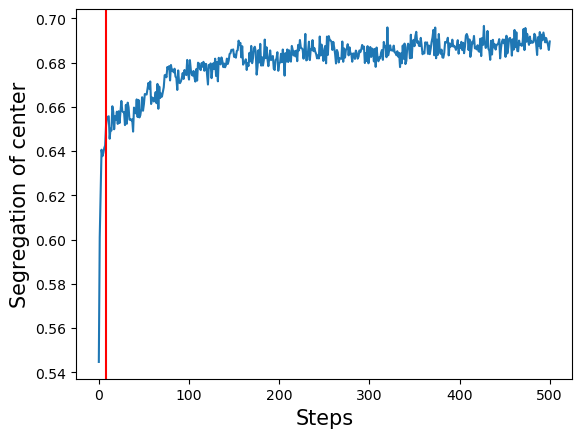

In [8]:

plt.plot(model_df["center_segregation"])
plt.xlabel("Steps", size=15)
plt.ylabel("Segregation of center", size=15)
plt.axvline(x = step_treshold, color = 'r')
plt.savefig('tippingpoint.pdf')  
plt.show()